# Análise exporatória

In [1]:
import sys
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

plt.style.use('bmh')

In [2]:
df1=pd.read_csv('tmdb_5000_movies.csv') 
df2=pd.read_csv('tmdb_5000_credits.csv')
#df3=pd.read_csv('IMDB Dataset.csv')

pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.width')
##pd.set_option('max_colwidth', 80)

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [5]:
df2.columns = ['id','title','cast','crew']
df1= df1.merge(df2,on='id')

In [6]:
def maximum_absolute_scaling(df1):
    
    df_scaled = df1.copy()
    
    for column in df_scaled.columns:
        df_scaled['budget'] = df_scaled['budget']  / df_scaled['budget'].abs().max()
        df_scaled['runtime'] = df_scaled['runtime']  / df_scaled['runtime'].abs().max()
        df_scaled['revenue'] = df_scaled['revenue']  / df_scaled['revenue'].abs().max()
        df_scaled['vote_count'] = df_scaled['vote_count']  / df_scaled['vote_count'].abs().max()
        df_scaled['vote_average'] = df_scaled['vote_average']  / df_scaled['vote_average'].abs().max()
        df_scaled['popularity'] = df_scaled['popularity']  / df_scaled['popularity'].abs().max()
    return df_scaled
    

df1 = maximum_absolute_scaling(df1)


In [7]:
df1.head(4).transpose()

,0,1,2,3
budget,0.623684,0.789474,0.644737,0.657895
genres,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam..."
homepage,http://www.avatarmovie.com/,http://disney.go.com/disneypictures/pirates/,http://www.sonypictures.com/movies/spectre/,http://www.thedarkknightrises.com/
id,19995,285,206647,49026
keywords,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,..."
original_language,en,en,en,en
original_title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises
overview,"In the 22nd century, a paraplegic Marine is di...","Captain Barbossa, long believed to be dead, ha...",A cryptic message from Bond’s past sends him o...,Following the death of District Attorney Harve...
popularity,0.171815,0.158846,0.122635,0.128272
production_companies,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""name"": ""Legendary Pictures"", ""id"": 923}, {""..."


In [8]:
pd.set_option('display.max_colwidth', 200)
df1['genres'].head(6)

0    [{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]
1                                            [{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]
2                                              [{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 80, "name": "Crime"}]
3                  [{"id": 28, "name": "Action"}, {"id": 80, "name": "Crime"}, {"id": 18, "name": "Drama"}, {"id": 53, "name": "Thriller"}]
4                                   [{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 878, "name": "Science Fiction"}]
5                                            [{"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}]
Name: genres, dtype: object

# DESVIO PADRÃO e VARIANCIA

In [9]:
print(f'Desvio padrão pelo "PANDAS": {df1.std()}')
print(f'Variância pelo "PANDAS": {df1.var()}')

Desvio padrão pelo "PANDAS": budget              0.107164
id              88694.614033
popularity          0.036338
revenue             0.058414
runtime             0.066899
vote_average        0.119461
vote_count          0.089775
dtype: float64
Variância pelo "PANDAS": budget          1.148416e-02
id              7.866735e+09
popularity      1.320432e-03
revenue         3.412233e-03
runtime         4.475505e-03
vote_average    1.427098e-02
vote_count      8.059552e-03
dtype: float64


# Distribuição por <i>orçamento

count    4803.000000
mean        0.076434
std         0.107164
min         0.000000
25%         0.002079
50%         0.039474
75%         0.105263
max         1.000000
Name: budget, dtype: float64


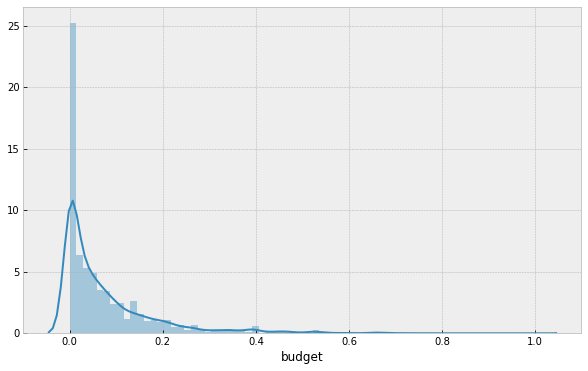

In [10]:
n_data = len(df1.budget)
n_bins = np.sqrt(n_data)
n_bins = int(n_bins)

print(df1['budget'].describe())
plt.figure(figsize=(10, 6))
sns.distplot(df1['budget'], bins=n_bins, hist_kws={'alpha': 0.4});

In [11]:
df1_num = df1.select_dtypes(include = ['float64', 'int64'])
del df1_num['id']
df1_num.head()

,budget,popularity,revenue,runtime,vote_average,vote_count
0,0.623684,0.171815,1.000000,0.479290,0.72,0.858057
1,0.789474,0.158846,0.344696,0.500000,0.69,0.327225
2,0.644737,0.122635,0.315884,0.437870,0.63,0.324753
3,0.657895,0.128272,0.389151,0.488166,0.76,0.662158
4,0.684211,0.050169,0.101916,0.390533,0.61,0.154450


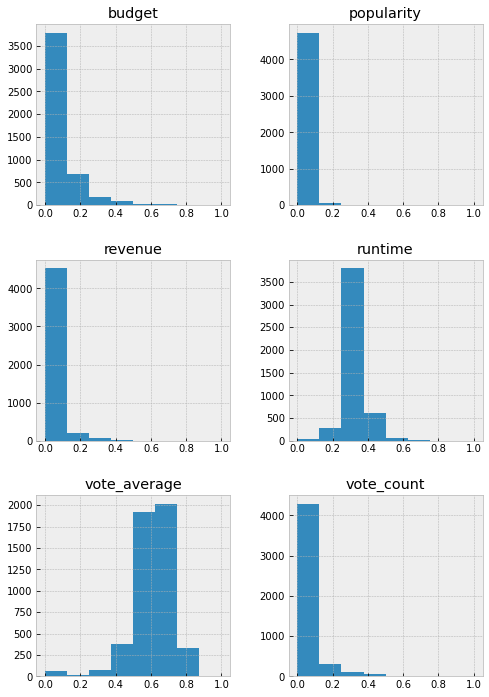

In [12]:
df1_num.hist(figsize=(8, 12), bins=8, xlabelsize=10, ylabelsize=10);

# CORRELAÇÃO

In [13]:
df1_num_corr = df1_num.corr()['budget'][1:6] # -1 because the latest row is SalePrice
f_list = df1_num_corr[abs(df1_num_corr) > 0.5].sort_values(ascending=False)
print("Existem {} correlações com a entidade Orçamento:\n{}".format(len(f_list), f_list))

Existem 3 correlações com a entidade Orçamento:
revenue       0.730823
vote_count    0.593180
popularity    0.505414
Name: budget, dtype: float64


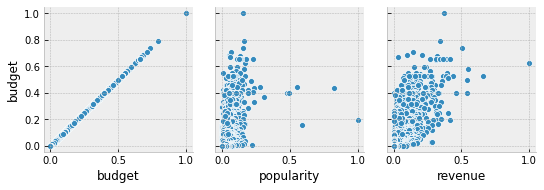

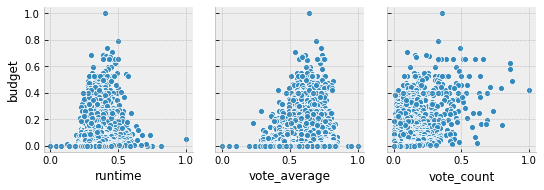

In [14]:
for i in range(0, len(df1_num.columns), 3):
    sns.pairplot(data=df1_num,
                x_vars=df1_num.columns[i:i+3],
                y_vars=['budget'])

# CORRELAÇÃO com SEABORN Pearson por heatmap

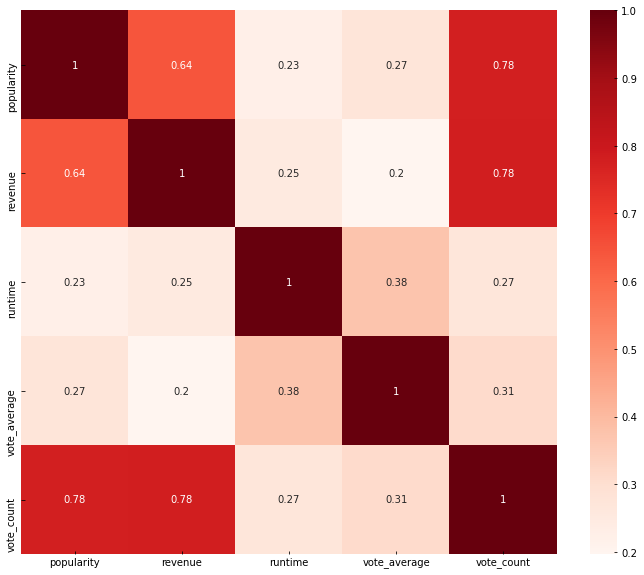

In [15]:
plt.figure(figsize=(12,10))
corr = df1_num.drop('budget', axis=1).corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

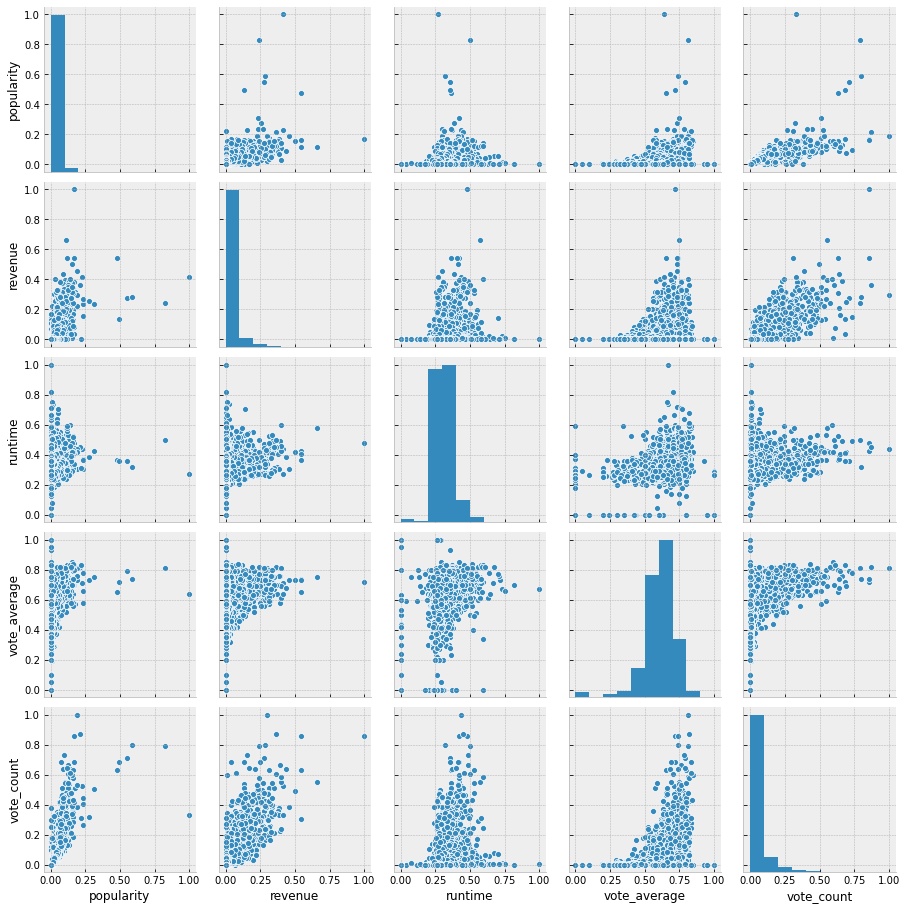

In [16]:
%config InlineBackend.figure_format = 'png' 
sns.pairplot(df1[['popularity', 'revenue', 'runtime', 
                 'vote_average', 'vote_count']]);

# RELAÇÃO QUANTITATIVA –> QUANTITATIVA 

In [17]:
q_list = ['popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']
df1_q_values = df1[q_list]
df1_q_values.head()

,popularity,revenue,runtime,vote_average,vote_count
0,0.171815,1.000000,0.479290,0.72,0.858057
1,0.158846,0.344696,0.500000,0.69,0.327225
2,0.122635,0.315884,0.437870,0.63,0.324753
3,0.128272,0.389151,0.488166,0.76,0.662158
4,0.050169,0.101916,0.390533,0.61,0.154450


In [18]:
features_to_analyse = [x for x in q_list if x in f_list]
features_to_analyse.append('budget')
features_to_analyse

['popularity', 'revenue', 'vote_count', 'budget']

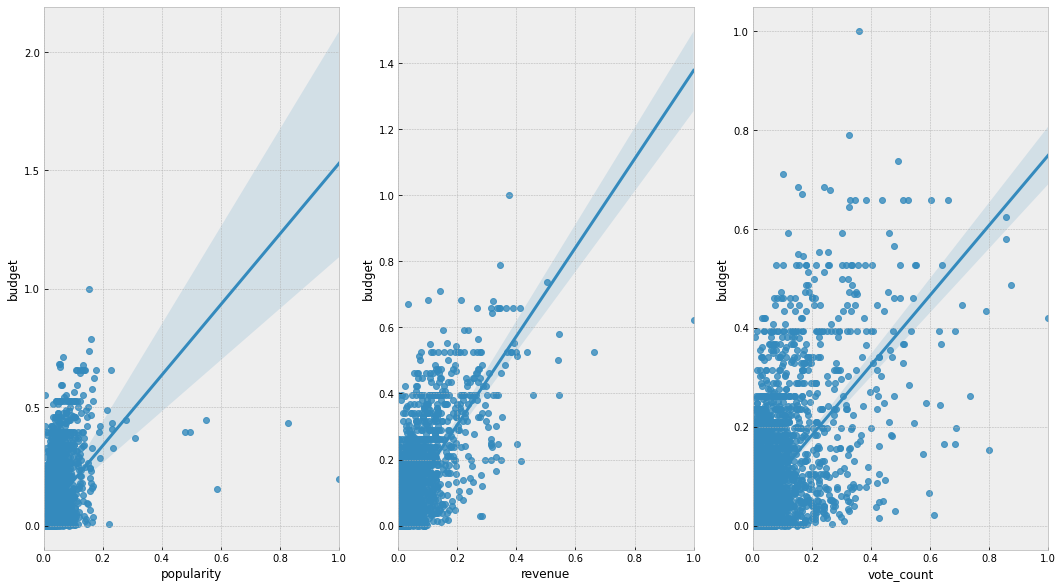

In [19]:
fig, ax = plt.subplots(round(len(features_to_analyse) / 3), 3, figsize = (18, 10))

for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse) - 1:
        sns.regplot(x=features_to_analyse[i],y='budget', data=df1[features_to_analyse], ax=ax)

# RELAÇÃO CATEGORICA –> QUANTITATIVA

In [20]:
categorical_features = [a for a in q_list[:-1] + df1.columns.tolist() if (a not in q_list[:-1]) or (a not in df1.columns.tolist())]
df1_categ = df1[categorical_features]
df1_categ.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,production_companies,production_countries,release_date,spoken_languages,status,tagline,title_x,vote_count,title_y,cast,crew
0,0.623684,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {""id"": 878, ""name"": ""Science Fiction""}]",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"": 2964, ""name"": ""future""}, {""id"": 3386, ""name"": ""space war""}, {""id"": 3388, ""name"": ""space colony""}, {""id"": 3679, ""name"": ""society""}, {""id"": 3801, ""name...",en,Avatar,"In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.","[{""name"": ""Ingenious Film Partners"", ""id"": 289}, {""name"": ""Twentieth Century Fox Film Corporation"", ""id"": 306}, {""name"": ""Dune Entertainment"", ""id"": 444}, {""name"": ""Lightstorm Entertainment"", ""id""...","[{""iso_3166_1"": ""US"", ""name"": ""United States of America""}, {""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2009-12-10,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,Enter the World of Pandora.,Avatar,0.858057,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""credit_id"": ""5602a8a7c3a3685532001c9a"", ""gender"": 2, ""id"": 65731, ""name"": ""Sam Worthington"", ""order"": 0}, {""cast_id"": 3, ""character"": ""Neytiri"", ""cred...","[{""credit_id"": ""52fe48009251416c750aca23"", ""department"": ""Editing"", ""gender"": 0, ""id"": 1721, ""job"": ""Editor"", ""name"": ""Stephen E. Rivkin""}, {""credit_id"": ""539c47ecc3a36810e3001f87"", ""department"": ..."
1,0.789474,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""name"": ""Action""}]",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""name"": ""drug abuse""}, {""id"": 911, ""name"": ""exotic island""}, {""id"": 1319, ""name"": ""east india trading company""}, {""id"": 2038, ""name"": ""love of one's life...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of the Earth with Will Turner and Elizabeth Swann. But nothing is quite as it seems.","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""name"": ""Jerry Bruckheimer Films"", ""id"": 130}, {""name"": ""Second Mate Productions"", ""id"": 19936}]","[{""iso_3166_1"": ""US"", ""name"": ""United States of America""}]",2007-05-19,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,0.327225,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Sparrow"", ""credit_id"": ""52fe4232c3a36847f800b50d"", ""gender"": 2, ""id"": 85, ""name"": ""Johnny Depp"", ""order"": 0}, {""cast_id"": 5, ""character"": ""Will Turner"", ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""department"": ""Camera"", ""gender"": 2, ""id"": 120, ""job"": ""Director of Photography"", ""name"": ""Dariusz Wolski""}, {""credit_id"": ""52fe4232c3a36847f800b4fd"", ""d..."
2,0.644737,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 80, ""name"": ""Crime""}]",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name"": ""based on novel""}, {""id"": 4289, ""name"": ""secret agent""}, {""id"": 9663, ""name"": ""sequel""}, {""id"": 14555, ""name"": ""mi6""}, {""id"": 156095, ""name"": ""brit...",en,Spectre,"A cryptic message from Bond’s past sends him on a trail to uncover a sinister organization. While M battles political forces to keep the secret service alive, Bond peels back the layers of deceit ...","[{""name"": ""Columbia Pictures"",

In [21]:
df1_not_num = df1_categ.select_dtypes(include = ['O'])
print('Existem {} categóricas, são elas:\n{}'.format(len(df1_not_num.columns), df1_not_num.columns.tolist()))

Existem 16 categóricas, são elas:
['genres', 'homepage', 'keywords', 'original_language', 'original_title', 'overview', 'production_companies', 'production_countries', 'release_date', 'spoken_languages', 'status', 'tagline', 'title_x', 'title_y', 'cast', 'crew']


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 <a list of 37 Text major ticklabel objects>)

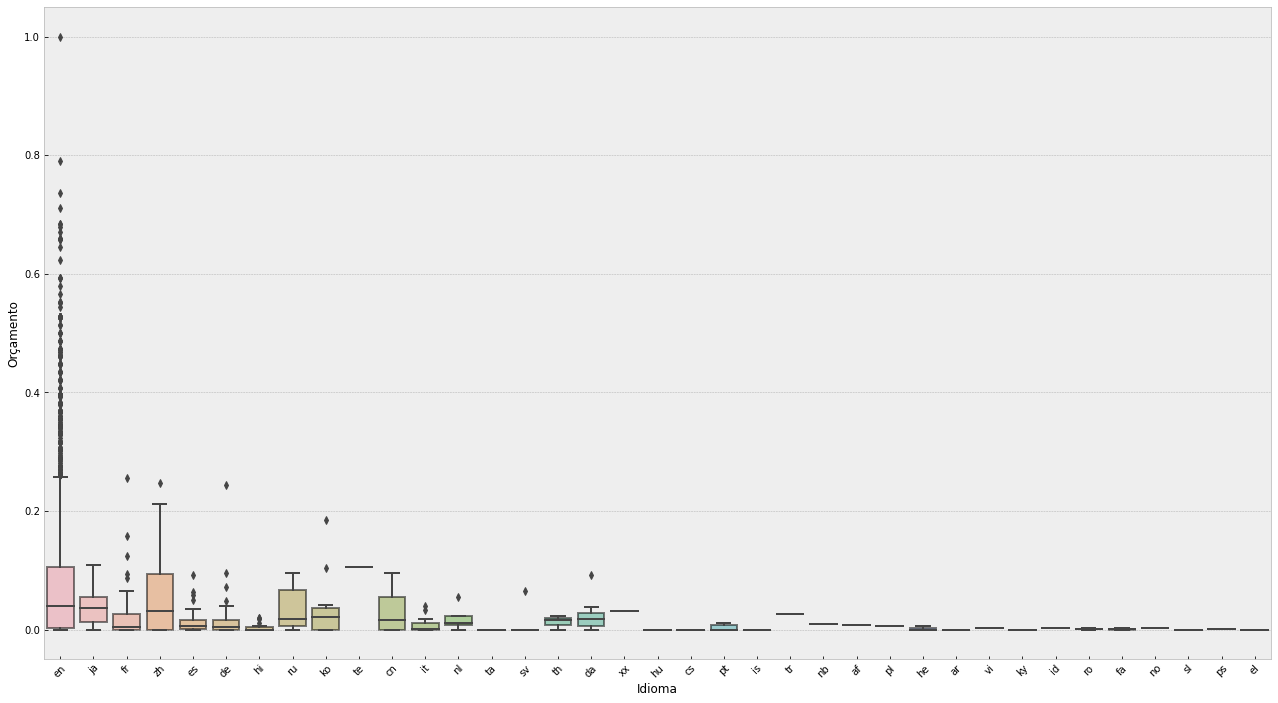

In [28]:
plt.figure(figsize = (22, 12))

ax = sns.boxplot(x='original_language', y='budget', data=df1_categ)
ax.set(ylabel="Orçamento")
ax.set(xlabel="Idioma")

plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

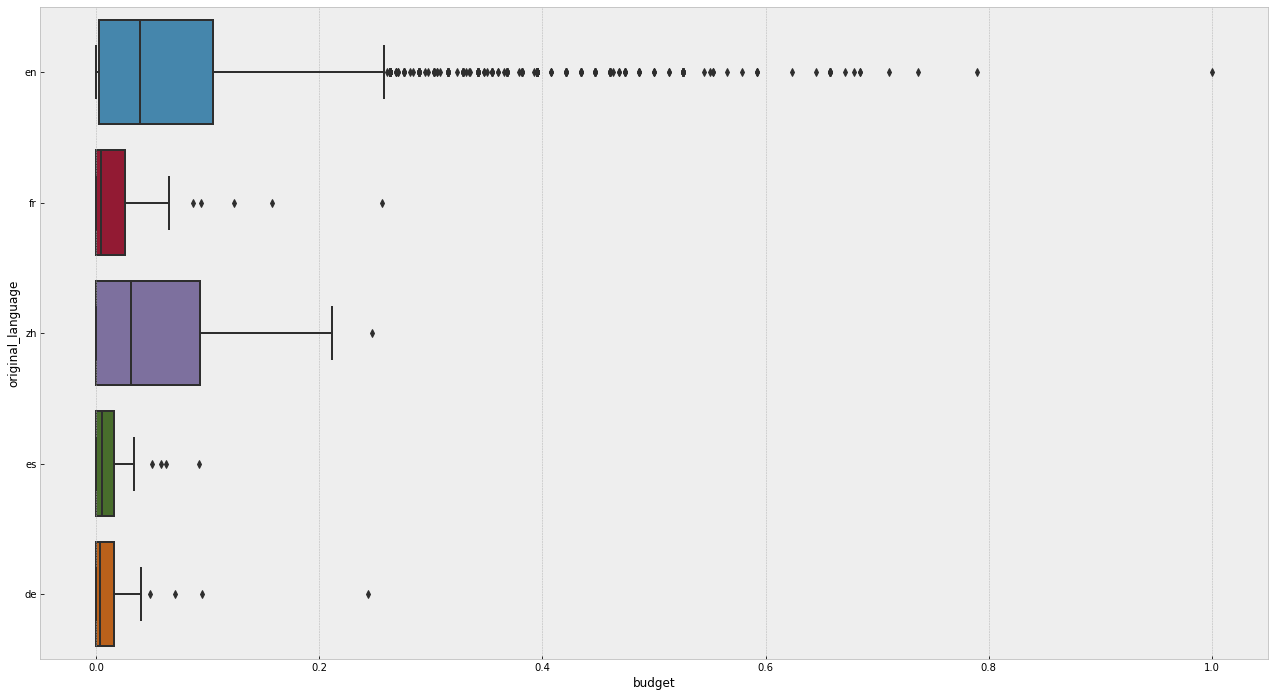

In [23]:
plt.figure(figsize = (22, 12))

top_platforms = df1_categ['original_language'].value_counts().sort_values(ascending=False).head(5).index.values
sns.boxplot(y="original_language", x="budget", 
            data=df1_categ[df1_categ['original_language'].isin(top_platforms)], orient="h");